In [1]:
import pandas as pd
import numpy as np
import pyodbc
import warnings
from slugify import slugify

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.simplefilter("ignore")

In [2]:
df_roto = pd.read_csv(r'C:\Users\bobby\Downloads\all_rotowire_stats.csv')

In [3]:
df_roto.reset_index(drop=True, inplace =True)

In [4]:
server = 'localhost\SQLEXPRESS'
database = 'nba_game_data'

In [7]:
df_roto['line_Type'] = ''
for i, row in df_roto.iterrows():
    if row['Market_Name'] == 'Rebounds':
        df_roto.loc[i,'line_Type'] ='REB'
    elif row['Market_Name'] == '3PT Made':
        df_roto.loc[i,'line_Type'] ='FG3M'
    elif row['Market_Name'] == 'Assists':
        df_roto.loc[i,'line_Type'] ='AST'
    elif row['Market_Name'] == 'Blocks':
        df_roto.loc[i,'line_Type'] ='BLK'
    elif row['Market_Name'] == 'PTS+REB+AST':
        df_roto.loc[i,'line_Type'] ='PTS+REB+AST'
    elif row['Market_Name'] == 'Turnovers':
        df_roto.loc[i,'line_Type'] ='TOV'
    elif row['Market_Name'] == 'Points':
        df_roto.loc[i,'line_Type'] ='PTS'
    elif row['Market_Name'] == 'Steals':
        df_roto.loc[i,'line_Type'] ='STL'
        
df_roto['Opponent'] = df_roto['Opponent'].apply(lambda x: x.replace('@','').strip())

In [90]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';')
cursor = cnxn.cursor()
sql = """
SELECT 
    [SEASON_YEAR],
    [PLAYER_ID],
    [PLAYER_NAME],
    [TEAM_ABBREVIATION],
    [GAME_ID],
    [GAME_DATE],
    [WL],
    [PTS],
    [OREB],
    [DREB],
    [REB],
    [AST],
    [TOV],
    [STL],
    [BLK],
    [FG3M],
    [AST] + [REB] + [PTS] as PTS_REB_AST,
    ROUND(AVG(CAST(PTS AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS PPG,          -- Points Per Game
    ROUND(AVG(CAST(FGM AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FGMPG,          -- Field Goals Made Per Game
    ROUND(AVG(CAST(FGA AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FGAPG,          -- Field Goals Attempted Per Game
    ROUND(AVG(CAST(FG_PCT AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FGPCTPG,    -- Field Goal Percentage
    ROUND(AVG(CAST(FG3M AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FG3MPG,        -- Three-Point Field Goals Made Per Game
    ROUND(AVG(CAST(FG3A AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FG3APG,        -- Three-Point Field Goals Attempted Per Game
    ROUND(AVG(CAST(FG3_PCT AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FG3_PCT,  -- Three-Point Field Goal Percentage
    ROUND(AVG(CAST(FTM AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FTMPG,          -- Free Throws Made Per Game
    ROUND(AVG(CAST(FTA AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FTAPG,          -- Free Throws Attempted Per Game
    ROUND(AVG(CAST(FT_PCT AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS FT_PCT,    -- Free Throw Percentage
    ROUND(AVG(CAST(OREB AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS OREBPG,        -- Offensive Rebounds Per Game
    ROUND(AVG(CAST(DREB AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS DREBPG,        -- Defensive Rebounds Per Game
    ROUND(AVG(CAST(REB AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS REBPG,          -- Rebounds Per Game
    ROUND(AVG(CAST(AST AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS APG,          -- Assists Per Game
    ROUND(AVG(CAST(TOV AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS TOVPG,          -- Turnovers Per Game
    ROUND(AVG(CAST(STL AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS SPG,          -- Steals Per Game
    ROUND(AVG(CAST(BLK AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS BPG,          -- Blocks Per Game
    ROUND(AVG(CAST(BLKA AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS BLKA,        -- Blocked Attempts Per Game
    ROUND(AVG(CAST(PF AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS PFPG,            -- Personal Fouls Per Game
    ROUND(AVG(CAST(PFD AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS PFDPG,          -- Personal Fouls Drawn Per Game
    ROUND(AVG(CAST(PLUS_MINUS AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS PlusMinusPG, -- Plus/Minus Per Game
    ROUND(AVG(CAST(DD2 AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS DD2PG,          -- Double-Doubles Per Game
    ROUND(AVG(CAST(TD3 AS FLOAT)) OVER (PARTITION BY PLAYER_ID, SEASON_YEAR ORDER BY GAME_DATE ROWS BETWEEN UNBOUNDED PRECEDING AND 1 PRECEDING), 2) AS TD3PG           -- Triple-Doubles Per Game
FROM 
    [nba_game_data].[dbo].[PlayerGameLogs]
WHERE 
    yearSeason = 2024
ORDER BY 
    GAME_DATE;
  """
df_actual = pd.read_sql(sql,cnxn)

In [91]:
df_actual['Date'] = pd.to_datetime(df_actual['GAME_DATE'])
df_roto['Date'] = pd.to_datetime(df_roto['Date'])

# Slugify player names for both DataFrames
df_actual['Player_Slug'] = df_actual['PLAYER_NAME'].apply(slugify)
df_roto['Player_Slug'] = df_roto['Player'].apply(slugify)

In [92]:
df_combined = pd.merge(df_actual, df_roto, on = ['Player_Slug', 'Date'], how = 'inner')

In [93]:
df_combined.reset_index(drop=True, inplace=True)

In [94]:
df_combined['actual'] = None
for i, row in df_combined.iterrows():

    if row['Market_Name'] == 'Rebounds':
        df_combined.loc[i,'actual'] = df_combined.loc[i,'REB']
    elif row['Market_Name'] == '3PT Made':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'FG3M']
    elif row['Market_Name'] == 'Assists':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'AST']
    elif row['Market_Name'] == 'Blocks':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'BLK']
    elif row['Market_Name'] == 'PTS+REB+AST':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'PTS']+df_combined.loc[i,'REB']+df_combined.loc[i,'AST']
    elif row['Market_Name'] == 'Turnovers':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'TOV']
    elif row['Market_Name'] == 'Points':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'PTS']
    elif row['Market_Name'] == 'Steals':
        df_combined.loc[i,'actual'] =df_combined.loc[i,'STL']

In [95]:
df_combined['target'] = (df_combined['actual']>df_combined['Line']).astype(int)

In [96]:
df_simp_stats = df_combined[[
        #'PLAYER_ID', 'PLAYER_NAME','GAME_ID','Market_Name','Line','actual',
    'target','PPG','FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
       'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
       'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG']]

Percentage Over Rate by Market Type:
Market_Name
3PT Made       48.214286
Assists        49.462366
Blocks         38.461538
PTS+REB+AST    45.934959
Points         47.736626
Rebounds       46.153846
Steals         52.380952
Turnovers      52.830189
Name: target, dtype: float64


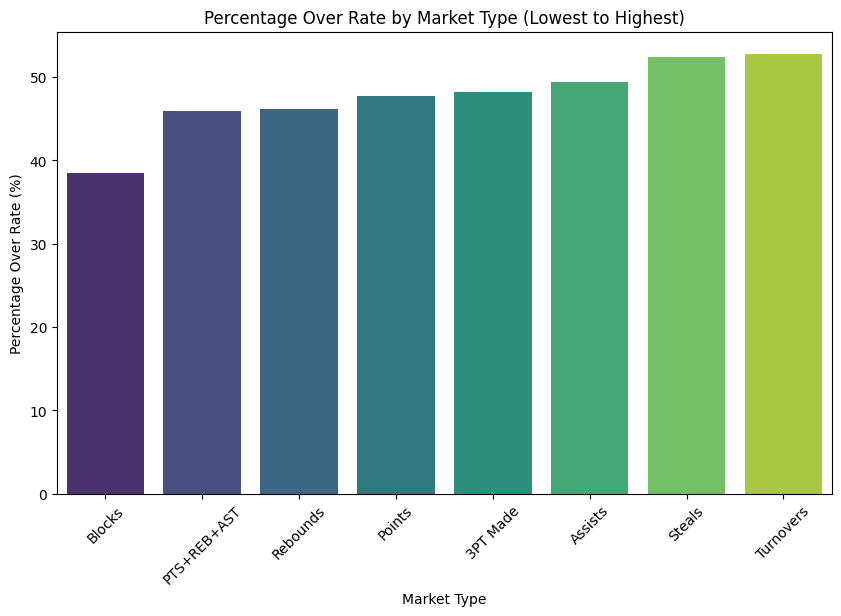

In [16]:
percentage_over_by_market = df_combined.groupby('Market_Name')['target'].mean() * 100

# Print the result
print("Percentage Over Rate by Market Type:")
print(percentage_over_by_market)
percentage_over_by_market_sorted = percentage_over_by_market.sort_values()
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_over_by_market_sorted.index, y=percentage_over_by_market_sorted.values, palette='viridis')
plt.title('Percentage Over Rate by Market Type (Lowest to Highest)')
plt.ylabel('Percentage Over Rate (%)')
plt.xlabel('Market Type')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [18]:
line_types = df_combined['Market_Name'].unique()

In [21]:
features = df_combined[[
        #'PLAYER_ID', 'PLAYER_NAME','GAME_ID','Market_Name','Line','actual',
       'Market_Name', 'target','PPG','FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
       'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
       'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG']]

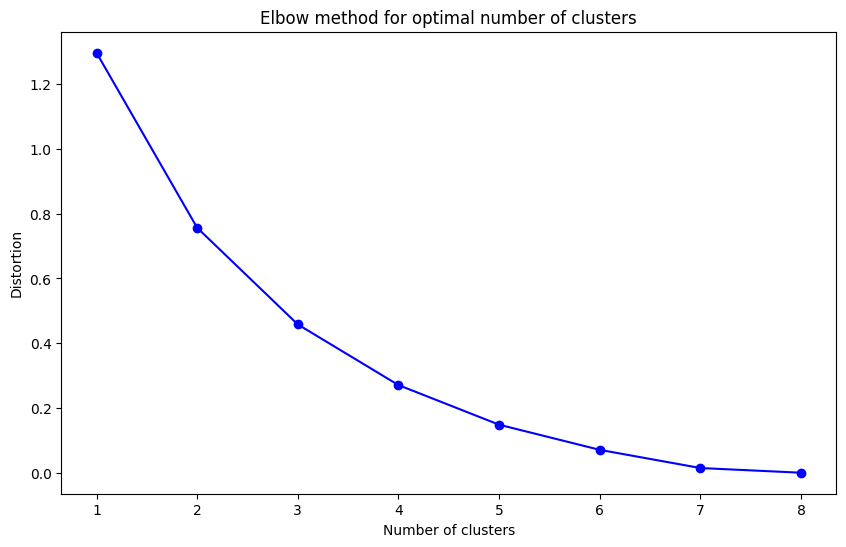

PTS+REB+AST    2
Points         2
Rebounds       1
Blocks         0
Assists        1
3PT Made       2
Turnovers      1
Steals         3
Name: feature_cluster, dtype: int32

In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'features' is your DataFrame and 'line_types' is a list of market names
# Initialize an empty DataFrame with columns as features
columns = ['PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
           'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
           'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG']
final = pd.DataFrame(index=line_types, columns=columns)

scaler = StandardScaler()

for line_type in line_types:
    temp = features.loc[features['Market_Name'] == line_type]
    temp = temp[['target'] + columns]
    
    # Scale the features
    temp[columns] = scaler.fit_transform(temp[columns])
    
    correlation_matrix = temp.corr()
    correlations = correlation_matrix['target'].drop('target')
    
    # Use correlation values directly
    final.loc[line_type, correlations.index] = correlations

# Handle missing values if any (if some correlations were not computed due to lack of data)
final = final.fillna(0)

# Perform K-Means clustering
# Determine the optimal number of clusters (elbow method)
distortions = []
K = range(1, 9)  # You can change the range as needed
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final)
    distortions.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow method for optimal number of clusters')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 4  # Replace this with the number identified from the plot

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(final)

# Add the cluster labels to the DataFrame
final['feature_cluster'] = clusters

# Display the clustered data
final['feature_cluster']



In [113]:
hit_rate = pd.DataFrame(percentage_over_by_market)
cluster = pd.DataFrame(final['feature_cluster'])
pd.merge(hit_rate, cluster, left_index=True, right_index=True)


,target,feature_cluster
3PT Made,48.214286,2
Assists,49.462366,1
Blocks,38.461538,0
PTS+REB+AST,45.934959,2
Points,47.736626,2
Rebounds,46.153846,1
Steals,52.380952,3
Turnovers,52.830189,1


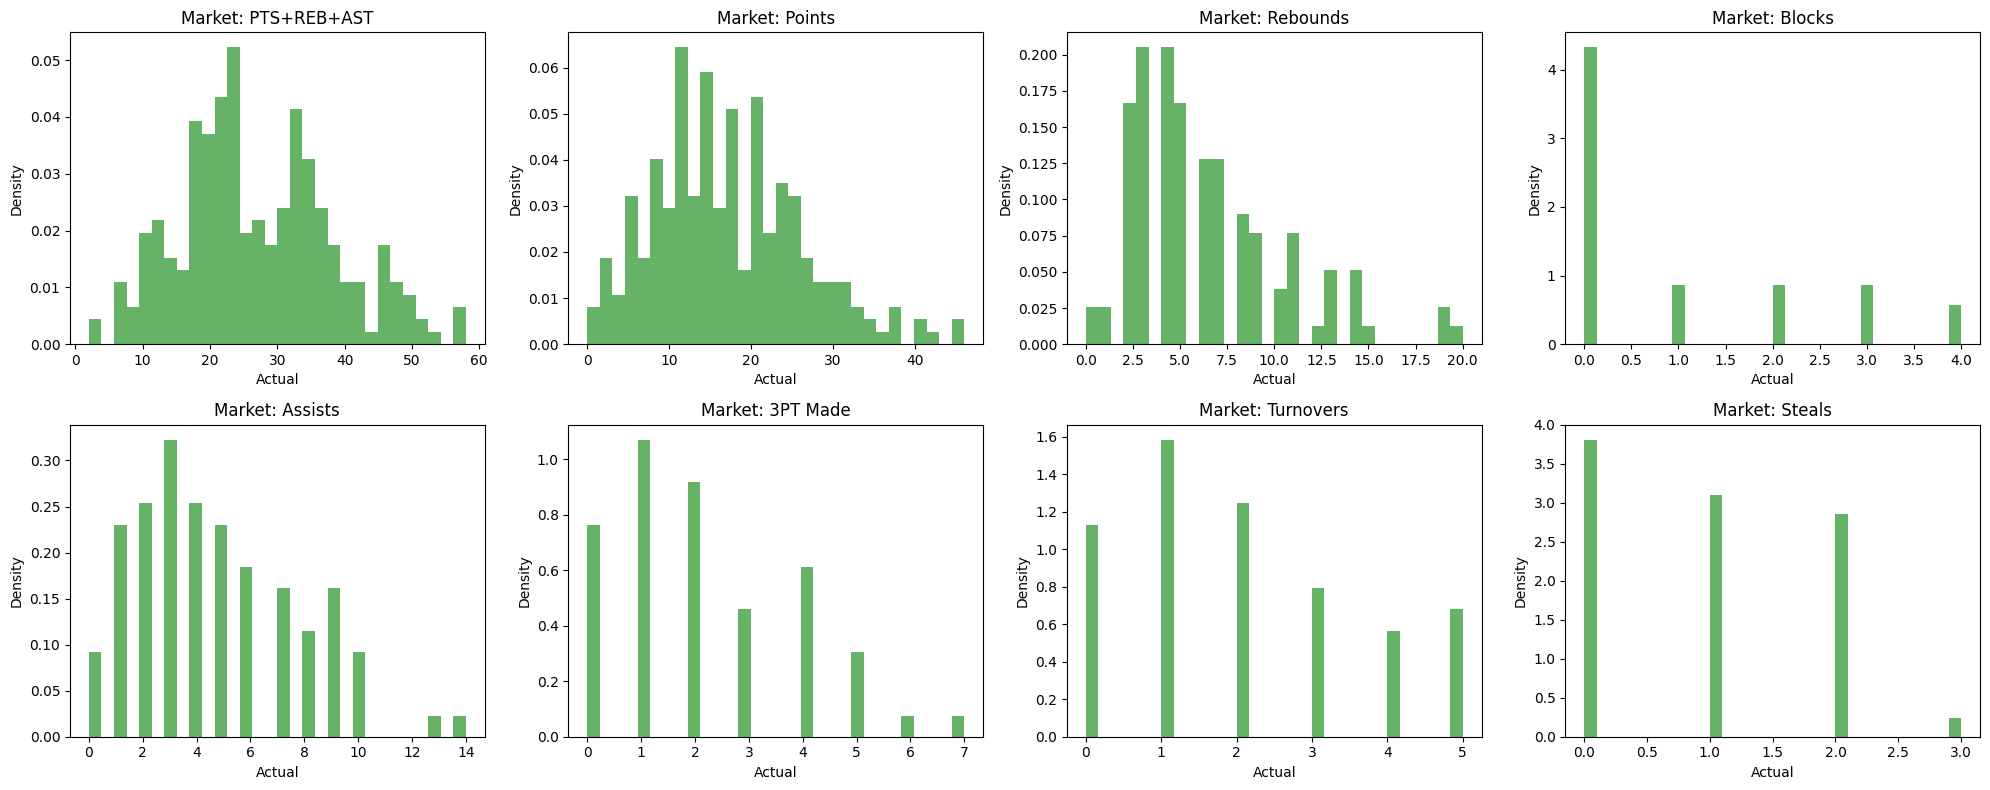

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' is your DataFrame and 'line_types' is a list of market names
line_types = df_combined['Market_Name'].unique()

# Number of rows and columns for the subplots
n_cols = 4  # Adjust based on how many plots you want per row
n_rows = int(np.ceil(len(line_types) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, line_type in enumerate(line_types):
    temp = df_combined.loc[df_combined['Market_Name'] == line_type]
    
    # Plot the normalized distribution of the 'actual' column
    axes[i].hist(temp['actual'], density=True, bins=30, alpha=0.6, color='g')
    axes[i].set_title(f'Market: {line_type}')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


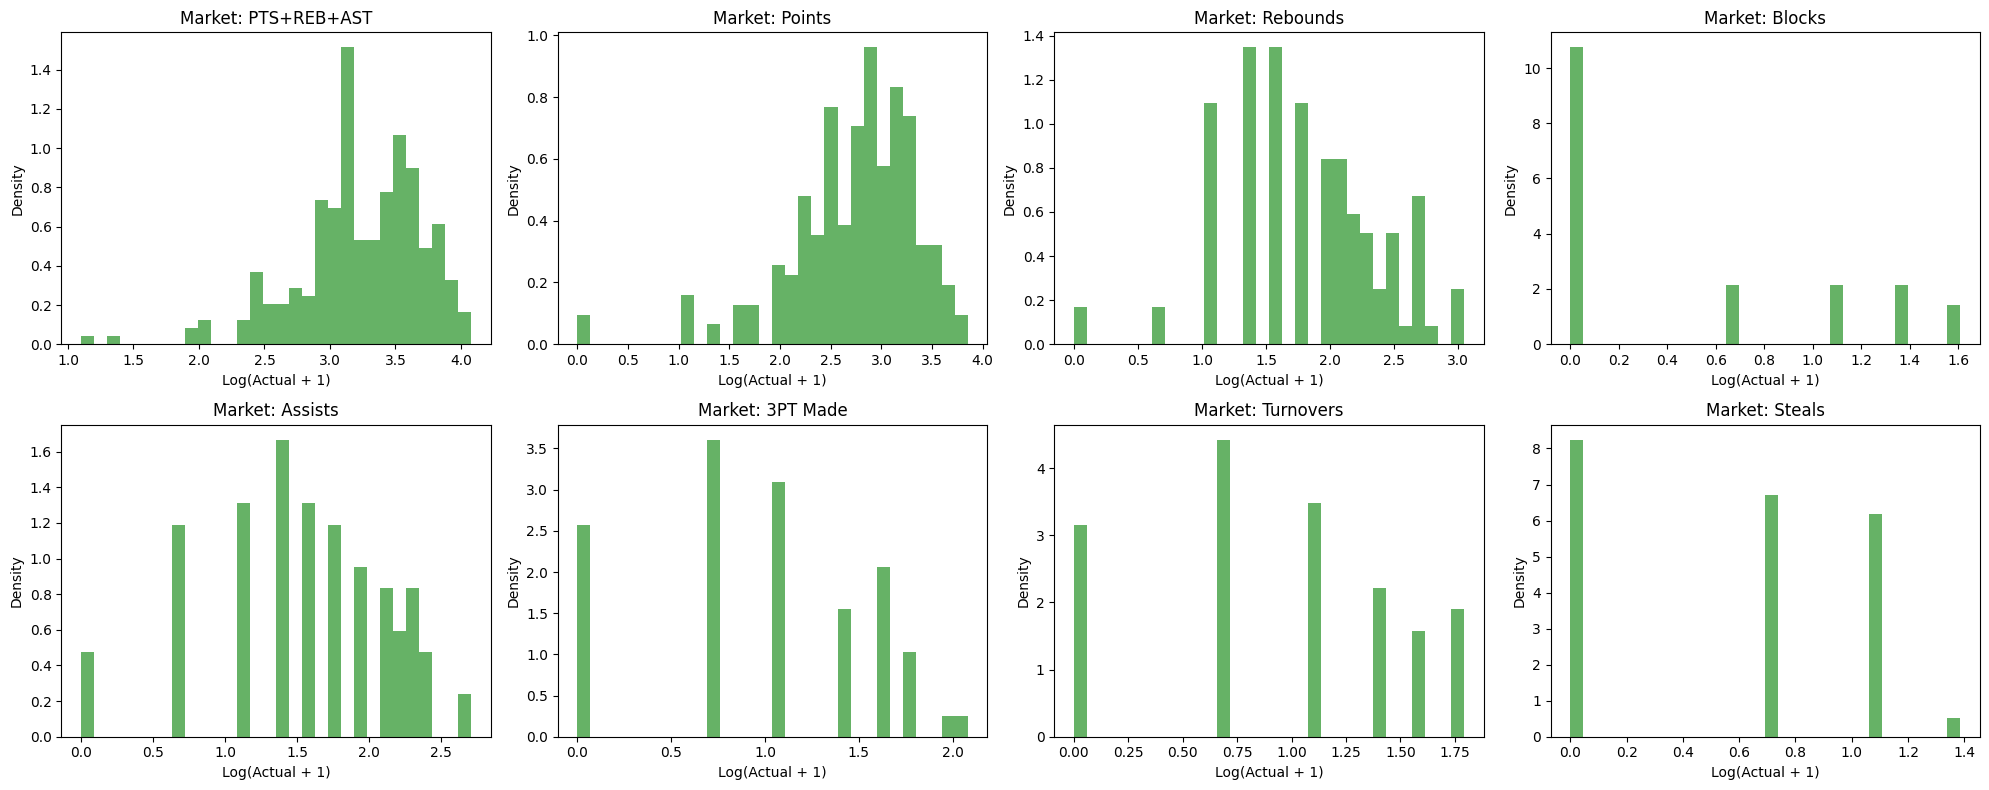

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features' is your DataFrame and 'line_types' is a list of market names
line_types = df_combined['Market_Name'].unique()

# Number of rows and columns for the subplots
n_cols = 4  # Adjust based on how many plots you want per row
n_rows = int(np.ceil(len(line_types) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, line_type in enumerate(line_types):
    temp = df_combined.loc[features['Market_Name'] == line_type]
    
    # Log transform the 'actual' values
    log_actual = np.log(temp['actual'].astype(float) + 1)  # Adding 1 to avoid log(0)
    
    # Plot the normalized distribution of the log-transformed 'actual' column
    axes[i].hist(log_actual, density=True, bins=30, alpha=0.6, color='g')
    axes[i].set_title(f'Market: {line_type}')
    axes[i].set_xlabel('Log(Actual + 1)')
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [103]:
line_types

array(['PTS+REB+AST', 'Points', 'Rebounds', 'Blocks', 'Assists',
       '3PT Made', 'Turnovers', 'Steals'], dtype=object)

In [116]:
feat = pd.merge(hit_rate, cluster, left_index=True, right_index=True)
feat.sort_values(by='feature_cluster')

,target,feature_cluster
Blocks,38.461538,0
Assists,49.462366,1
Rebounds,46.153846,1
Turnovers,52.830189,1
3PT Made,48.214286,2
PTS+REB+AST,45.934959,2
Points,47.736626,2
Steals,52.380952,3


# results

<p>after looking at teh results i want to do teh following groups, i.e. four sepperate models</p>
<li>Group 1: PTS+REB+AST, Points, and im going to try 3-point-made with this as well</li>
<li>Group 2: Assists, Rebounds, and im going to try without Turnovers first then try with it  <b>Important note: This looked best Logged</b>  
<li>Group 3: Steals Only</li>
<li>Group 4: Blocks Only</li>

In [108]:
for line_type in line_types:
    temp = df_combined.loc[df_combined['Market_Name']==line_type]
    temp = temp[['target','PPG','FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
       'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
       'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 'DD2PG', 'TD3PG']]
    print(line_type)
    correlation_matrix = temp.corr()
    print(correlation_matrix['target'])

PTS+REB+AST
target         1.000000
PPG           -0.148627
FGMPG         -0.145579
FGAPG         -0.141031
FGPCTPG       -0.048617
FG3MPG        -0.039619
FG3APG        -0.049696
FG3_PCT       -0.010856
FTMPG         -0.147700
FTAPG         -0.136251
FT_PCT        -0.085175
OREBPG        -0.027445
DREBPG        -0.141478
REBPG         -0.113081
APG           -0.173553
TOVPG         -0.137884
SPG           -0.078015
BPG           -0.047085
BLKA          -0.014701
PFPG           0.074380
PFDPG         -0.146534
PlusMinusPG   -0.056519
DD2PG         -0.169918
TD3PG         -0.130520
Name: target, dtype: float64
Points
target         1.000000
PPG           -0.146890
FGMPG         -0.129824
FGAPG         -0.136149
FGPCTPG       -0.060206
FG3MPG        -0.094365
FG3APG        -0.102212
FG3_PCT       -0.067508
FTMPG         -0.152486
FTAPG         -0.144547
FT_PCT        -0.102840
OREBPG        -0.000484
DREBPG        -0.065257
REBPG         -0.048145
APG           -0.159057
TOVPG         -0

In [139]:
import pandas as pd

# Assuming df_combined is already loaded and contains the relevant columns
line_types = df_combined['Market_Name'].unique()  # Adjust if 'Market_Name' is named differently

for line_type in line_types:
    temp = df_combined.loc[df_combined['Market_Name'] == line_type]
    temp = temp[['target', 'PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
                 'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
                 'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG']]
    print(f"Market Name: {line_type}")
    correlation_matrix = temp.corr()
    top_correlations = correlation_matrix['target'].drop('target').abs().sort_values(ascending=False).head(5)
    print(top_correlations)


Market Name: PTS+REB+AST
APG      0.173553
PPG      0.148627
FTMPG    0.147700
PFDPG    0.146534
FGMPG    0.145579
Name: target, dtype: float64
Market Name: Points
APG      0.159057
PFDPG    0.154201
FTMPG    0.152486
PPG      0.146890
FTAPG    0.144547
Name: target, dtype: float64
Market Name: Rebounds
BPG        0.125391
FGPCTPG    0.114858
PFPG       0.113443
APG        0.093886
SPG        0.092446
Name: target, dtype: float64
Market Name: Blocks
TOVPG    0.328033
FTMPG    0.292672
PPG      0.279357
FTAPG    0.271936
FGMPG    0.260192
Name: target, dtype: float64
Market Name: Assists
PFPG           0.174644
FG3APG         0.151961
FG3MPG         0.142029
PlusMinusPG    0.123734
PFDPG          0.099557
Name: target, dtype: float64
Market Name: 3PT Made
APG        0.289794
SPG        0.192324
PFDPG      0.157946
FGPCTPG    0.156045
FTAPG      0.151116
Name: target, dtype: float64
Market Name: Turnovers
BPG       0.203120
OREBPG    0.180086
PFDPG     0.172313
FT_PCT    0.133050
FTAPG  

In [124]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Assuming df_combined is already loaded
data = []

# Iterating over each unique market name
for line_type in df_combined['Market_Name'].unique():
    temp = df_combined[df_combined['Market_Name'] == line_type]
    temp = temp[['target', 'PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
                         'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
                         'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 'DD2PG', 'TD3PG']]
    # Calculate the mean percentage over rate
    percentage_over = temp['target'].mean()

    # Calculate the mean of the top 5 absolute correlations
    correlations = temp[['target', 'PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
                         'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
                         'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 'DD2PG', 'TD3PG']].corr()['target'].drop('target').abs()
    top_correlations = correlations.nlargest(5).mean()

    # Calculate skewness, kurtosis, and volatility (standard deviation)
    skewness = temp.drop('target', axis=1).skew().mean()
    kurtosis = temp.drop('target', axis=1).kurtosis().mean()
    volatility = temp.drop('target', axis=1).std().mean()

    # Append the result to the list
    data.append({'Market_Name': line_type, 
                 'Percentage_Over': percentage_over, 
                 'Avg_Top5_Correlation': top_correlations,
                 'Skewness': skewness,
                 'Kurtosis': kurtosis,
                 'Volatility': volatility})

# Convert list to DataFrame
market_features = pd.DataFrame(data)

# Normalize the features
for feature in ['Percentage_Over', 'Avg_Top5_Correlation', 'Skewness', 'Kurtosis', 'Volatility']:
    market_features[feature] = (market_features[feature] - market_features[feature].min()) / \
                                (market_features[feature].max() - market_features[feature].min())

# Clustering with KMeans
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
market_features['Cluster'] = kmeans.fit_predict(market_features[['Percentage_Over', 'Avg_Top5_Correlation', 'Skewness', 'Kurtosis', 'Volatility']])

# Output the results sorted by cluster
print(market_features.sort_values(by='Cluster'))



   Market_Name  Percentage_Over  Avg_Top5_Correlation  Skewness  Kurtosis  \
0  PTS+REB+AST         0.520120              0.276079  0.535598  0.584614   
1       Points         0.645509              0.243404  0.526100  0.585575   
7       Steals         0.968735              0.533643  0.559504  0.428863   
3       Blocks         0.000000              1.000000  0.433442  0.325405   
2     Rebounds         0.535354              0.000000  0.238669  0.000000   
4      Assists         0.765613              0.197178  0.000000  0.258659   
5     3PT Made         0.678752              0.603158  1.000000  0.874179   
6    Turnovers         1.000000              0.343619  0.639319  1.000000   

   Volatility  Cluster  
0    0.681558        0  
1    0.656181        0  
7    0.674129        0  
3    0.000000        1  
2    1.000000        2  
4    0.899641        2  
5    0.775701        3  
6    0.872648        3  


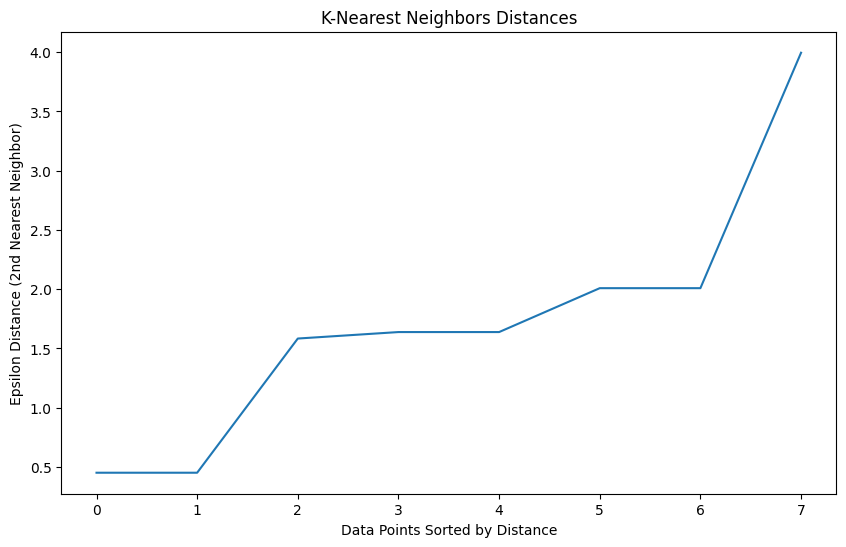

   Market_Name  Percentage_Over  Avg_Top5_Correlation  Skewness  Kurtosis  \
0  PTS+REB+AST         0.459350              0.157266  0.733033  2.106519   
1       Points         0.477366              0.151436  0.728969  2.108608   
7       Steals         0.523810              0.203224  0.743264  1.768189   
2     Rebounds         0.461538              0.108005  0.605957  0.836587   
4      Assists         0.494624              0.143188  0.503814  1.398461   
3       Blocks         0.384615              0.286438  0.689314  1.543451   
5     3PT Made         0.482143              0.215628  0.931783  2.735529   
6    Turnovers         0.528302              0.169318  0.777423  3.008846   

   Volatility  Cluster_DBSCAN  
0    1.614559               0  
1    1.607592               0  
7    1.612519               0  
2    1.701979               1  
4    1.674428               1  
3    1.427455               2  
5    1.640403               3  
6    1.667017               4  


In [134]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming df_combined is already loaded
data = []

# Iterating over each unique market name
for line_type in df_combined['Market_Name'].unique():
    temp = df_combined[df_combined['Market_Name'] == line_type]
    temp = temp[['target', 'PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
                 'FTAPG', 'FT_PCT', 'OREBPG', 'DREBPG', 'REBPG', 'APG', 'TOVPG', 'SPG',
                 'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 'DD2PG', 'TD3PG']]

    # Calculate statistics
    percentage_over = temp['target'].mean()
    correlations = temp.corr()['target'].drop('target').abs()
    top_correlations = correlations.nlargest(5).mean()
    skewness = temp.drop('target', axis=1).skew().mean()
    kurtosis = temp.drop('target', axis=1).kurtosis().mean()
    volatility = temp.drop('target', axis=1).std().mean()

    # Append the result to the list
    data.append({'Market_Name': line_type, 
                 'Percentage_Over': percentage_over, 
                 'Avg_Top5_Correlation': top_correlations,
                 'Skewness': skewness,
                 'Kurtosis': kurtosis,
                 'Volatility': volatility})

# Convert list to DataFrame
market_features = pd.DataFrame(data)

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(market_features[['Percentage_Over', 'Avg_Top5_Correlation', 'Skewness', 'Kurtosis', 'Volatility']])

# Finding the best epsilon using NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)

# Sort and plot distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('Epsilon Distance (2nd Nearest Neighbor)')
plt.show()

# Use DBSCAN with chosen eps and min_samples
dbscan = DBSCAN(eps=2, min_samples=1)  # Adjust 'eps' based on the plot results
clusters = dbscan.fit_predict(features_scaled)

# Add the cluster labels to the DataFrame
market_features['Cluster_DBSCAN'] = clusters

# Output the results sorted by cluster label
print(market_features.sort_values(by='Cluster_DBSCAN'))



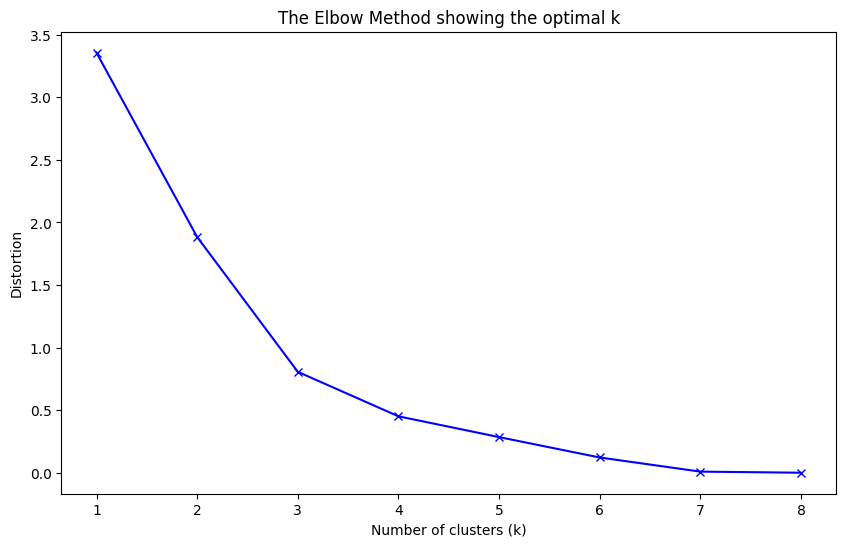

In [123]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming market_features DataFrame is already loaded and prepared with the necessary features
features = market_features[['Percentage_Over', 'Avg_Top5_Correlation', 'Skewness', 'Kurtosis', 'Volatility']]

# Calculate distortions for a range of number of clusters
distortions = []
K = range(1, 9)  # Testing from 1 to 10 clusters (adjust range as needed)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

# Plotting the distortions to create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


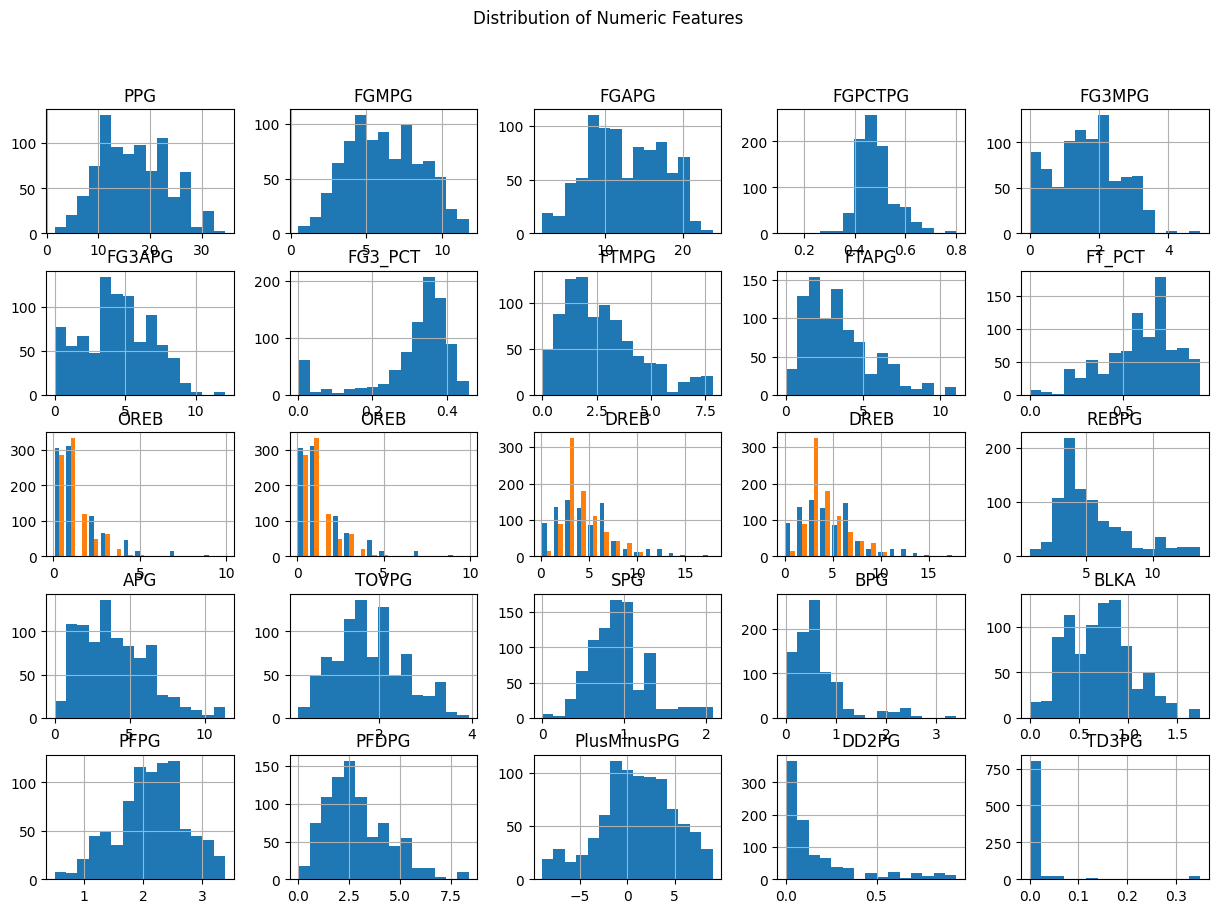

In [93]:
# Histograms for the distribution of numeric features
numeric_cols = ['PPG', 'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 
                'FTMPG', 'FTAPG', 'FT_PCT', 'OREB', 'DREB', 'REBPG', 'APG', 
                'TOVPG', 'SPG', 'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 
                'DD2PG', 'TD3PG']  # List of numeric columns
df_combined[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [80]:
df_combined.columns[2:60]

Index(['PLAYER_NAME', 'TEAM_ABBREVIATION', 'GAME_ID', 'GAME_DATE', 'WL', 'PTS',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'FG3M', 'PPG',
       'FGMPG', 'FGAPG', 'FGPCTPG', 'FG3MPG', 'FG3APG', 'FG3_PCT', 'FTMPG',
       'FTAPG', 'FT_PCT', 'OREB', 'DREB', 'REBPG', 'APG', 'TOVPG', 'SPG',
       'BPG', 'BLKA', 'PFPG', 'PFDPG', 'PlusMinusPG', 'DD2PG', 'TD3PG', 'Date',
       'Player_Slug', 'Player', 'Position', 'Team', 'Opponent', 'Time',
       'Market_Name', 'Line', 'Site_Less', 'Site_More', 'Prediction', 'Lean',
       'DFS_Pickem_Sites_Factor', 'Sportsbooks_Factor',
       'RotoWire_Projection_Factor', 'Hit_Rate_Factor', 'RotoWire_Projection',
       'Weighted_Hit_Rate', 'At_Home', 'Matchup'],
      dtype='object')